In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import gym
import warnings
from glob import glob
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
warnings.filterwarnings('ignore')
os.chdir('../../../hw1/')

/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.9/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:326: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


### Scratch Work

In [7]:
MJ_ENV_NAMES = ["Ant-v4", "Walker2d-v4", "HalfCheetah-v4", "Hopper-v4"]
for env_names in MJ_ENV_NAMES:
    env = gym.make(env_names, render_mode=None)
    print(env.spec.max_episode_steps)

1000
1000
1000
1000


/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.9/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/jarvis/opt/anaconda3/envs/cs285/lib/python3.9/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


def load_run_metric(logdir):

    data_path = os.path.join(os.getcwd(), '../../data')
    logdir = os.path.join(data_path, logdir)
    logfile = os.path.join(logdir, 'events*')
    logfile = glob(logfile)[0]
    metrics = {}
    
    for event in summary_iterator(logfile):
        for v in event.summary.value:
            metrics[v.tag] = v.simple_value
            
    return metrics

### Helper Functions

In [82]:
def load_run_metric(logdir_name, iterations=1):

    # source: https://tbparse.readthedocs.io/en/latest/pages/raw.html#event-accumulator
    data_path = os.path.join(os.getcwd(), 'data')
    logdir = os.path.join(data_path, logdir_name)
    logfile = os.path.join(logdir, 'events*')
    logfile = glob(logfile)[0]
    metrics = {}
    
    event_acc = EventAccumulator(logfile)
    event_acc.Reload()

    if iterations == 1:
        for metric in event_acc.Tags()['scalars']:
            metrics[metric] = event_acc.Scalars(metric)[0].value
    else:
        for iter in np.arange(iterations):
            metrics[iter] = {}

            if iter == 0:
                for metric in event_acc.Tags()['scalars']:
                    metrics[iter][metric] = event_acc.Scalars(metric)[iter].value
            else:
                for metric in event_acc.Tags()['scalars'][:-1]:
                    metrics[iter][metric] = event_acc.Scalars(metric)[iter].value
                
    return metrics

In [52]:
def agent_performance(logdir_name, iterations=1):
    metrics = load_run_metric(logdir_name, iterations=0)
    return np.round(
        metrics['Eval_AverageReturn'] / metrics['Initial_DataCollection_AverageReturn'],
        4
    )

## 3. Behavioral Cloning

### 3.1

All other parameter values (that's not shown) are set to their default values in `run_hw1.py`

#### Ant-v4

In [63]:
bc_cmd = "\
    python cs285/scripts/run_hw1.py \
    --expert_policy_file cs285/policies/experts/Ant.pkl \
    --env_name Ant-v4 \
    --exp_name bc_ant --n_iter 1 \
    --expert_data cs285/expert_data/expert_data_Ant-v4.pkl \
    --video_log_freq -1 \
    --num_agent_train_steps_per_iter 1500 \
    --batch_size 1000 \
    --eval_batch_size 6000 \
    --train_batch_size 100 \
    --n_layers 2 \
    --learning_rate 5e-3 \
    "

os.system(bc_cmd)

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw1/cs285/scripts/../../data/q1_bc_ant_Ant-v4_10-09-2023_18-58-28
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Ant.pkl
obs (1, 111) (1, 111)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 2302.4248046875
Eval_StdReturn : 1136.13818359375
Eval_MaxReturn : 3593.55712890625
Eval_MinReturn : 596.0662841796875
Eval_AverageEpLen : 767.375
Train_AverageReturn : 4681.891673935816
Train_StdReturn : 30.70862278765526
Train_MaxReturn : 4712.600296723471
Train_MinReturn : 4651.18305114816
Train_AverageEpLen : 1000.0
Training Loss : 0.01826418936252594
Train_EnvstepsSoFar : 0
TimeSinceStart : 4.4904398918151855
Initial_DataCollection_AverageReturn : 4681

0

In [64]:
agent_performance('q1_bc_ant')

0.4918

#### Hopper-v4

In [70]:
bc_cmd = bc_cmd.replace(
    'Ant', 'Hopper'
)
bc_cmd = bc_cmd.replace(
    'ant', 'hopper'
)
os.system(bc_cmd)

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw1/cs285/scripts/../../data/q1_bc_hopper_Hopper-v4_10-09-2023_19-51-11
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Hopper.pkl
obs (1, 11) (1, 11)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 836.744384765625
Eval_StdReturn : 290.33160400390625
Eval_MaxReturn : 1363.1572265625
Eval_MinReturn : 212.55860900878906
Eval_AverageEpLen : 281.3636363636364
Train_AverageReturn : 3717.5129936182307
Train_StdReturn : 0.3530361779417035
Train_MaxReturn : 3717.8660297961724
Train_MinReturn : 3717.159957440289
Train_AverageEpLen : 1000.0
Training Loss : 0.022663865238428116
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.49267578125
Initial_DataCollection_

0

In [71]:
agent_performance('q1_bc_hopper')

0.2251

### 3.2 Effect of Hyperparameter [`batch_size`]

Using Ant-V4 task to sweep through increments of the hyperparameter

In [32]:
for i in np.arange(500, 5500, 500):

    new_train_steps_per_iter = i
    bc_cmd = f"\
        python cs285/scripts/run_hw1.py \
        --expert_policy_file cs285/policies/experts/Ant.pkl \
        --env_name Ant-v4 \
        --exp_name bc_ant --n_iter 1 \
        --expert_data cs285/expert_data/expert_data_Ant-v4.pkl \
        --video_log_freq -1 \
        --num_agent_train_steps_per_iter {new_train_steps_per_iter} \
        --batch_size 1000 \
        --eval_batch_size 6000 \
        --train_batch_size 100 \
        --n_layers 2 \
        --learning_rate 5e-3 \
        "
    os.system(bc_cmd)


########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw1/cs285/scripts/../../data/q1_bc_ant_Ant-v4_10-09-2023_23-06-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Ant.pkl
obs (1, 111) (1, 111)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 320.0927734375
Eval_StdReturn : 233.46136474609375
Eval_MaxReturn : 832.557373046875
Eval_MinReturn : 27.40821075439453
Eval_AverageEpLen : 609.7272727272727
Train_AverageReturn : 4681.891673935816
Train_StdReturn : 30.70862278765526
Train_MaxReturn : 4712.600296723471
Train_MinReturn : 4651.18305114816
Train_AverageEpLen : 1000.0
Training Loss : 0.09652641415596008
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.7275471687316895
Initial_DataCollection_AverageRe

In [37]:
logdir_names = [
    'q1_bc_ant_Ant-v4_10-09-2023_23-06-40',
    'q1_bc_ant_Ant-v4_10-09-2023_23-06-45',
    'q1_bc_ant_Ant-v4_10-09-2023_23-06-50',
    'q1_bc_ant_Ant-v4_10-09-2023_23-06-55',
    'q1_bc_ant_Ant-v4_10-09-2023_23-07-00',
    'q1_bc_ant_Ant-v4_10-09-2023_23-07-06',
    'q1_bc_ant_Ant-v4_10-09-2023_23-07-12',
    'q1_bc_ant_Ant-v4_10-09-2023_23-07-19',
    'q1_bc_ant_Ant-v4_10-09-2023_23-07-26',
    'q1_bc_ant_Ant-v4_10-09-2023_23-07-34'
]

avg_return = []
std_return = []
train_steps_per_iter = [i for i in np.arange(500, 5500, 500)]

for logdir in logdir_names:
    
    metric = load_run_metric(logdir)
    avg_return.append(metric['Eval_AverageReturn'])
    std_return.append(metric['Eval_StdReturn'])

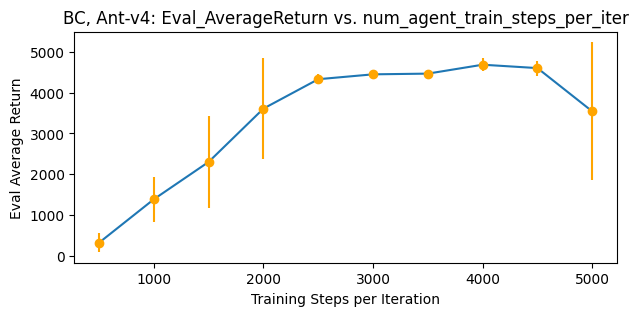

In [93]:
plt.figure(figsize=(7, 3))
plt.plot(train_steps_per_iter, avg_return)
plt.errorbar(train_steps_per_iter, avg_return, yerr = std_return, fmt ='o', color='orange')
plt.title('BC, Ant-v4: Eval_AverageReturn vs. num_agent_train_steps_per_iter')
plt.xlabel('Training Steps per Iteration')
plt.ylabel('Eval Average Return')
plt.show()

## 4. Dagger

### 4.2
For each task, I used the same parameters from Sectioon 3.2, with the exception of setting number of iteration to 10. 

#### Ant-v4

In [40]:
dagger_cmd = "\
    python cs285/scripts/run_hw1.py \
    --expert_policy_file cs285/policies/experts/Ant.pkl \
    --env_name Ant-v4 \
    --exp_name dagger_ant \
    --n_iter 10 \
    --do_dagger \
    --expert_data cs285/expert_data/expert_data_Ant-v4.pkl \
    --video_log_freq -1 \
    --num_agent_train_steps_per_iter 1500 \
    --batch_size 1000 \
    --eval_batch_size 6000 \
    --train_batch_size 100 \
    --n_layers 2 \
    --learning_rate 5e-3 \
    "

os.system(dagger_cmd)

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw1/cs285/scripts/../../data/q2_dagger_ant_Ant-v4_10-09-2023_23-29-51
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Ant.pkl
obs (1, 111) (1, 111)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 2302.4248046875
Eval_StdReturn : 1136.13818359375
Eval_MaxReturn : 3593.55712890625
Eval_MinReturn : 596.0662841796875
Eval_AverageEpLen : 767.375
Train_AverageReturn : 4681.891673935816
Train_StdReturn : 30.70862278765526
Train_MaxReturn : 4712.600296723471
Train_MinReturn : 4651.18305114816
Train_AverageEpLen : 1000.0
Training Loss : 0.01826418936252594
Train_EnvstepsSoFar : 0
TimeSinceStart : 4.354766130447388
Initial_DataCollection_AverageReturn : 4

0

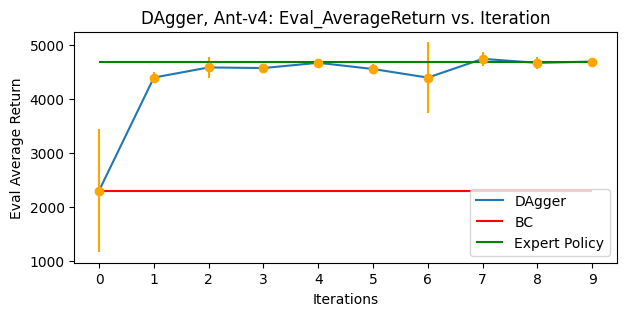

In [99]:
dagger_ant_metrics = load_run_metric('q2_dagger_ant', iterations=10)

iterations = np.arange(10)
dagger_ant_avg_return = [dagger_ant_metrics[i]['Eval_AverageReturn'] for i in iterations]
dagger_ant_std_return = [dagger_ant_metrics[i]['Eval_StdReturn'] for i in iterations]
ant_expert_return = dagger_ant_metrics[0]['Initial_DataCollection_AverageReturn']
ant_bc_return = load_run_metric('q1_bc_ant')['Eval_AverageReturn']

plt.figure(figsize=(7, 3))
plt.plot(iterations, dagger_ant_avg_return, label='DAgger')
plt.errorbar(iterations, dagger_ant_avg_return, yerr = dagger_ant_std_return, fmt ='o', color='orange')
plt.hlines(y=ant_bc_return, xmin=0, xmax=9, color='red', label='BC')
plt.hlines(y=ant_expert_return, xmin=0, xmax=9, color='green', label='Expert Policy')
plt.title('DAgger, Ant-v4: Eval_AverageReturn vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Eval Average Return')
plt.xticks(iterations)
plt.legend()
plt.show()

#### Hopper-v4

In [94]:
dagger_cmd = dagger_cmd.replace(
    'Ant', 'Hopper'
)
dagger_cmd = dagger_cmd.replace(
    'ant', 'hopper'
)
os.system(dagger_cmd)

########################
logging outputs to  /Users/jarvis/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Fall 2023/CS285/homework_fall2023/hw1/cs285/scripts/../../data/q2_dagger_hopper_Hopper-v4_11-09-2023_00-19-17
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Hopper.pkl
obs (1, 11) (1, 11)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 836.744384765625
Eval_StdReturn : 290.33160400390625
Eval_MaxReturn : 1363.1572265625
Eval_MinReturn : 212.55860900878906
Eval_AverageEpLen : 281.3636363636364
Train_AverageReturn : 3717.5129936182307
Train_StdReturn : 0.3530361779417035
Train_MaxReturn : 3717.8660297961724
Train_MinReturn : 3717.159957440289
Train_AverageEpLen : 1000.0
Training Loss : 0.022663865238428116
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.3704466819763184
Initial_DataCo

0

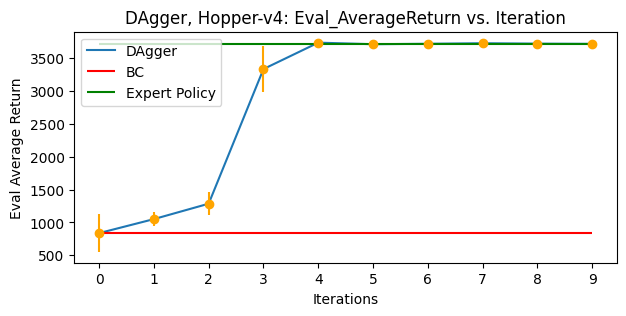

In [98]:
dagger_hopper_metrics = load_run_metric('q2_dagger_hopper', iterations=10)

dagger_hopper_avg_return = [dagger_hopper_metrics[i]['Eval_AverageReturn'] for i in iterations]
dagger_hopper_std_return = [dagger_hopper_metrics[i]['Eval_StdReturn'] for i in iterations]
hopper_expert_return = dagger_hopper_metrics[0]['Initial_DataCollection_AverageReturn']
hopper_bc_return = load_run_metric('q1_bc_hopper')['Eval_AverageReturn']

plt.figure(figsize=(7, 3))
plt.plot(iterations, dagger_hopper_avg_return, label='DAgger')
plt.errorbar(iterations, dagger_hopper_avg_return, yerr = dagger_hopper_std_return, fmt ='o', color='orange')
plt.hlines(y=hopper_bc_return, xmin=0, xmax=9, color='red', label='BC')
plt.hlines(y=hopper_expert_return, xmin=0, xmax=9, color='green', label='Expert Policy')
plt.title('DAgger, Hopper-v4: Eval_AverageReturn vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Eval Average Return')
plt.xticks(iterations)
plt.legend()
plt.show()